In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from matplotlib.ticker import MultipleLocator

In [5]:
feature_metadata = json.load(open(f"v4.3/features.json"))
for metadata in feature_metadata:
  print(metadata, len(feature_metadata[metadata]))


feature_sets = feature_metadata["feature_sets"]
for feature_set in ["small", "medium", "all"]:
  print(feature_set, len(feature_sets[feature_set]))

feature_set = feature_sets["medium"]

feature_stats 2376
feature_sets 17
targets 41
small 42
medium 705
all 2376


In [57]:
df_train = pd.read_parquet(
    f"v4.3/train_int8.parquet",
    columns=["era", "target"] + feature_set
)



In [7]:
df_coor = df_train.tail(1000000).corr()

C:\Users\Paco\AppData\Local\Temp\ipykernel_10020\3604152643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_coor = df_train.tail(1000000).corr()


In [22]:
df = df_coor.sort_values("target", ascending=False).reset_index()

df_top_20_corr = df.head(20)

df_top_20_corr

,index,target,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
0,target,1.000000,-0.000673,0.000632,0.000703,0.001964,0.000179,-0.000334,0.000705,0.002737,...,0.001401,-0.000368,0.001543,0.007071,-0.000740,0.003704,-0.001197,0.007682,0.000312,0.000028
1,feature_denuded_typed_wattmeter,0.010776,-0.004350,0.111161,0.058986,-0.021068,0.001117,-0.015603,0.007868,0.001551,...,-0.026045,-0.010628,-0.001993,0.047544,0.012672,-0.006352,0.059314,0.112136,0.027329,0.006360
2,feature_fribble_gusseted_stickjaw,0.010623,0.004218,0.034938,0.144281,0.063088,0.017427,0.028263,0.005976,0.085072,...,0.092455,0.017619,0.083190,0.142573,-0.025684,0.029492,0.122401,0.159517,-0.057647,0.052895
3,feature_hunchbacked_unturning_meditation,0.010492,-0.003699,0.163581,0.260268,-0.022792,0.030235,-0.000978,0.038631,0.111742,...,-0.016945,0.006432,0.056398,0.230826,0.032628,0.053512,0.327152,0.502378,0.066957,-0.014231
4,feature_distressed_bloated_disquietude,0.010172,0.008328,0.107158,0.227875,0.023908,0.016264,0.008933,0.041815,0.077187,...,0.064797,0.023314,0.072804,0.157701,-0.012852,0.089376,0.242183,0.453926,-0.031413,0.008873
5,feature_testicular_slashed_ventosity,0.010170,-0.007672,0.109841,0.067325,-0.017040,0.007392,-0.002622,0.007776,0.001951,...,-0.022164,0.001783,-0.000350,0.048125,0.009095,-0.006320,0.066033,0.107270,0.018992,0.012949
6,feature_approximal_telautographic_sharkskin,0.010082,0.011754,0.044270,0.152628,0.047239,0.007007,0.009458,0.014762,0.087700,...,0.083135,0.004483,0.077177,0.099609,-0.020640,0.034536,0.142742,0.253013,-0.039969,0.038146
7,feature_herbaged_brownish_consubstantialist,0.009924,0.003560,0.034409,0.147862,0.067849,0.005878,0.024022,0.012880,0.083757,...,0.093120,0.017740,0.080407,0.141620,-0.028688,0.031254,0.126716,0.168596,-0.052644,0.042961
8,feature_noctilucent_subcortical_proportionality,0.009875,-0.004662,0.165494,0.258179,-0.017513,0.029686,-0.004430,0.040985,0.107211,...,-0.017006,0.007591,0.054579,0.227739,0.046335,0.054522,0.321760,0.517403,0.063873,-0.015255
9,feature_leaky_overloaded_rhodium,0.009783,0.008151,0.086718,0.187779,0.032454,-0.004909,0.007961,0.038074,0.064005,...,0.061554,0.019740,0.054769,0.247084,-0.006800,0.072972,0.202298,0.296859,-0.036376,-0.003384


In [23]:
lista_20_mejores_correlaciones = list(set(df_top_20_corr["index"]))
lista_20_mejores_correlaciones

['target',
 'feature_solemn_wordier_needlework',
 'feature_reduplicative_appalling_metastable',
 'feature_incorporating_abominable_daily',
 'feature_leaky_overloaded_rhodium',
 'feature_hunchbacked_unturning_meditation',
 'feature_approximal_telautographic_sharkskin',
 'feature_simpatico_cadential_pup',
 'feature_completive_pedantical_sinecurist',
 'feature_testicular_slashed_ventosity',
 'feature_herbaged_brownish_consubstantialist',
 'feature_reservable_peristomal_emden',
 'feature_mythic_florentine_psammite',
 'feature_noctilucent_subcortical_proportionality',
 'feature_fribble_gusseted_stickjaw',
 'feature_distressed_bloated_disquietude',
 'feature_subinfeudatory_brainy_carmel',
 'feature_pruinose_raploch_roubaix',
 'feature_flawed_demonological_toady',
 'feature_denuded_typed_wattmeter']

In [58]:
df_filtrado = df_train[lista_20_mejores_correlaciones]

In [59]:
# # Mostrar el gráfico
plt.show()
df_filtrado.plot.bar(
title="Análisis Variables en el tiempo",
figsize=(16, 10),
layout=(7,5),
xticks=[],
subplots=True,
sharex=False,
legend=False,
snap=False
)

for ax in plt.gcf().axes:
    ax.set_xlabel("")
    ax.title.set_fontsize(11)
plt.tight_layout(pad=1.5)
plt.gcf().suptitle("Análisis Variables en el tiempo", fontsize=25)
plt.savefig(f'graficos_eda_numerai/descriptivo_variables.png')

In [24]:
df_cor_top = df_train[lista_20_mejores_correlaciones].corr()

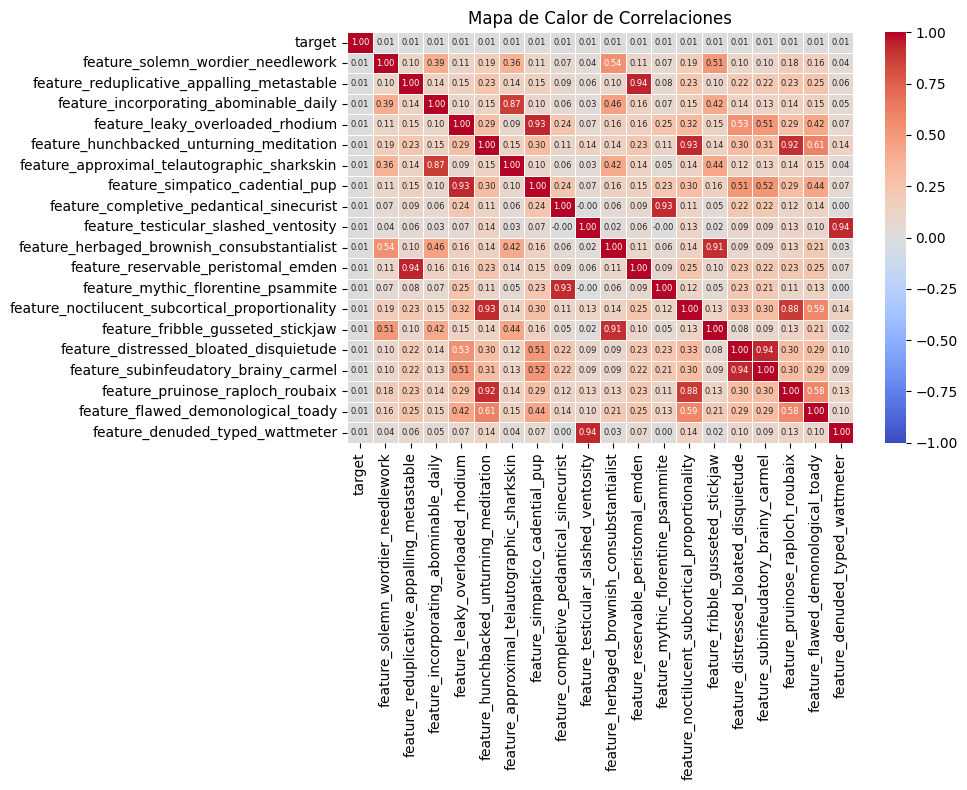

In [55]:
corr_matrix = df_cor_top.copy()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5, annot_kws={"size": 6} )
plt.title('Mapa de Calor de Correlaciones')
output_path = 'graficos_eda_numerai/correlaciones.jpg'

# Mostrar el gráfico
plt.tight_layout()
plt.savefig(output_path)
plt.show()

In [32]:
len(df_train.dropna())

2420521

In [5]:
df_train["era"].min()

'0001'

In [6]:
df_train["era"].max()

'0574'

In [7]:
df_train["era"].median()

304.0

In [24]:
df_filtrado =df_train[df_train["era"]=="0574"]
df_filtrado

,era,target,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,...,feature_witchy_orange_muley,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi
id,,,,,,,,,,,,,,,,,,,,,
n00025c2020feed2,0574,0.75,1,2,2,4,4,3,2,1,...,3,3,2,1,4,2,2,4,4,2
n000366ab45f8145,0574,0.50,0,1,1,4,2,3,2,3,...,2,3,3,2,0,4,4,1,3,1
n00107bb6ad344e6,0574,0.50,3,3,3,4,1,3,2,0,...,3,4,3,4,0,2,4,2,1,2
n0020fd6180f4d2e,0574,0.50,4,4,3,3,3,4,2,0,...,0,4,3,0,0,3,3,1,2,3
n003334ee3b65f03,0574,0.50,2,0,0,0,4,2,4,1,...,0,1,2,0,1,2,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffcc1dbdf2212e6,0574,0.75,0,2,1,1,4,2,0,4,...,4,2,4,3,4,4,4,4,3,0
nffd71b7f6a128df,0574,0.25,4,3,0,0,0,0,2,0,...,0,0,0,0,4,0,2,1,4,0
nffde3b371d67394,0574,0.25,1,2,1,2,3,2,4,2,...,3,2,1,2,2,0,3,4,3,0


In [25]:
df_filtrado =df_filtrado.drop(columns=[ "era"])
df_filtrado = df_filtrado.corr()

In [26]:
df_filtrado["target"]

target                                      1.000000
feature_abating_unadaptable_weakfish        0.005286
feature_ablest_mauritanian_elding          -0.002477
feature_acclimatisable_unfeigned_maghreb   -0.018333
feature_accommodable_crinite_cleft         -0.009744
                                              ...   
feature_wrought_muckier_temporality        -0.000660
feature_yauld_antediluvial_subprefecture   -0.027251
feature_yelled_hysteretic_eath              0.017343
feature_yoruban_unapplied_tawse             0.017178
feature_zygodactyl_exponible_lathi         -0.029233
Name: target, Length: 706, dtype: float64

In [16]:
df_correlaciones = pd.DataFrame()

In [27]:
df_correlaciones["correlacion_era_3"]=df_filtrado["target"]

In [36]:
df_correlaciones["media"]= (df_correlaciones["correlacion_era_1"]+df_correlaciones["correlacion_era_2"]+df_correlaciones["correlacion_era_3"])/3
df_correlaciones

,level_0,index,correlacion_era_1,correlacion_era_2,correlacion_era_3,media
0,0,target,1.000000,1.000000,1.000000,1.000000
1,1,feature_unrecognisable_waxier_paging,0.036324,0.027456,0.020646,0.028142
2,2,feature_coactive_bandoleered_trogon,0.030206,0.031433,0.020481,0.027373
3,3,feature_slantwise_aeronautical_interference,0.047413,0.028971,0.000826,0.025737
4,4,feature_brahminic_oligopsonistic_rossini,0.056207,0.026699,-0.007432,0.025158
...,...,...,...,...,...,...
701,701,feature_wealthy_asinine_beduin,NaN,0.015527,-0.022792,NaN
702,702,feature_whiggish_suffering_tonsillectomy,NaN,-0.001894,-0.002642,NaN
703,703,feature_won_stalwart_eisenstein,NaN,-0.003787,0.000496,NaN
704,704,feature_wrinkliest_unmaintainable_usk,NaN,-0.004544,-0.014203,NaN


In [38]:
df_correlaciones = df_correlaciones.sort_values("media", ascending=False).reset_index()
df_correlaciones.columns

0                                           target
1             feature_unrecognisable_waxier_paging
2              feature_coactive_bandoleered_trogon
3      feature_slantwise_aeronautical_interference
4         feature_brahminic_oligopsonistic_rossini
                          ...                     
701                 feature_wealthy_asinine_beduin
702       feature_whiggish_suffering_tonsillectomy
703                feature_won_stalwart_eisenstein
704          feature_wrinkliest_unmaintainable_usk
705                feature_yoruban_unapplied_tawse
Name: index, Length: 706, dtype: object

In [44]:
lista_40_correlaciones = list(set(df_correlaciones["index"].head(40)))

In [46]:
df_filtrado = df_train[lista_40_correlaciones]

In [49]:
df_cor = df_train.corr()

C:\Users\Paco\AppData\Local\Temp\ipykernel_11140\3440890620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cor = df_train.corr()


In [27]:
df_train = pd.read_parquet(
    f"v4.3/train_int8.parquet",
    columns=["era", "target"] + feature_set
)

df_validation = pd.read_parquet(
    f"v4.3/validation_int8.parquet",
    columns=["era", "target"] + feature_set
)

df_train["data_type"] = "Train"
df_validation["data_type"] = "Validation"

In [28]:
df_final= pd.concat([df_train, df_validation])
df_final

,era,target,feature_abating_unadaptable_weakfish,feature_ablest_mauritanian_elding,feature_acclimatisable_unfeigned_maghreb,feature_accommodable_crinite_cleft,feature_accretive_sorrier_skedaddle,feature_acetose_periotic_coronation,feature_adam_incantational_winemaker,feature_additive_untrustworthy_hierologist,...,feature_wombed_liberatory_malva,feature_won_stalwart_eisenstein,feature_wrathful_prolix_colotomy,feature_wrinkliest_unmaintainable_usk,feature_wrought_muckier_temporality,feature_yauld_antediluvial_subprefecture,feature_yelled_hysteretic_eath,feature_yoruban_unapplied_tawse,feature_zygodactyl_exponible_lathi,data_type
id,,,,,,,,,,,,,,,,,,,,,
n003bba8a98662e4,0001,0.25,0,4,0,4,2,0,2,1,...,0,2,4,2,4,3,2,2,3,Train
n003bee128c2fcfc,0001,0.75,4,2,2,2,2,3,2,1,...,3,2,0,2,2,1,3,2,1,Train
n0048ac83aff7194,0001,0.25,4,4,2,0,2,0,2,4,...,1,2,0,2,3,2,1,2,2,Train
n00691bec80d3e02,0001,0.75,1,4,1,1,2,0,2,2,...,1,2,2,2,3,2,2,2,2,Train
n00b8720a2fdc4f2,0001,0.50,0,2,0,0,2,0,2,3,...,1,2,0,2,0,1,1,2,1,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffca66cd1e34ceb,1130,NaN,2,1,1,4,0,4,0,4,...,4,1,4,4,4,2,1,4,0,Validation
nffe52d118b7e009,1130,NaN,2,3,3,2,3,3,4,2,...,2,1,1,0,1,2,3,0,4,Validation
nffe8d3cc6463362,1130,NaN,3,1,1,1,0,2,0,1,...,2,3,4,2,0,1,1,3,0,Validation


In [29]:
del df_train
del df_validation

In [30]:
df_final.groupby("data_type")["era"].min()

data_type
Train         0001
Validation    0575
Name: era, dtype: object

In [31]:
df_final.groupby("data_type")["era"].count()

data_type
Train         2420521
Validation    2824407
Name: era, dtype: int64

In [32]:
nan_counts = df_final.groupby('era')['target'].apply(lambda x: x.isna().sum()).reset_index()
nan_counts

,era,target
0,0001,0
1,0002,0
2,0003,0
3,0004,0
4,0005,0
...,...,...
1125,1126,4932
1126,1127,4914
1127,1128,4905
1128,1129,4900


In [33]:
df_final = df_final.dropna(subset="target")

In [34]:
nan_counts = df_final.groupby('era')['target'].apply(lambda x: x.isna().sum()).reset_index()
nan_counts

,era,target
0,0001,0
1,0002,0
2,0003,0
3,0004,0
4,0005,0
...,...,...
1120,1121,0
1121,1122,0
1122,1123,0
1123,1124,0


In [35]:
df_final["target"].isna().sum()

0

In [36]:

df_count = df_final.groupby(['era', 'data_type'])['target'].count().reset_index()

# Renombrar la columna 'target' a 'count' para claridad
df_count.rename(columns={'target': 'count'}, inplace=True)

# Crear la gráfica


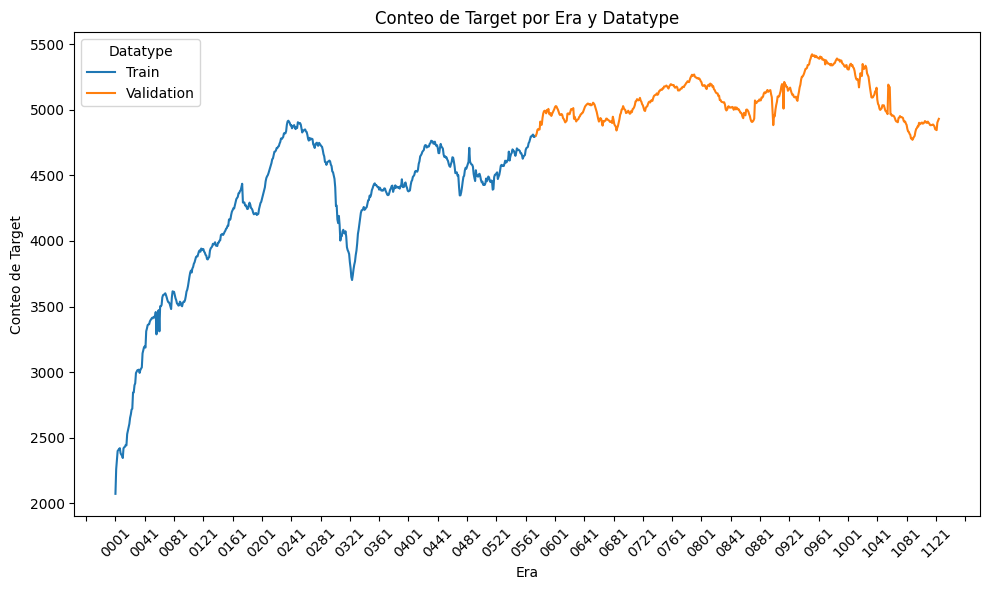

In [37]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_count, x='era', y='count', hue='data_type')

output_path = 'graficos_eda_numerai/distribucion_por_era.jpg'

# Personalizar la gráfica
plt.title('Conteo de Target por Era y Datatype')
plt.xlabel('Era')
plt.gca().xaxis.set_major_locator(MultipleLocator(40))
plt.ylabel('Conteo de Target')
plt.legend(title='Datatype')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(output_path)

# Mostrar la gráfica
plt.show()

C:\Users\Paco\AppData\Local\Temp\ipykernel_10020\964282296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final, x='data_type', y='target', inner='quartile', palette='Set2')


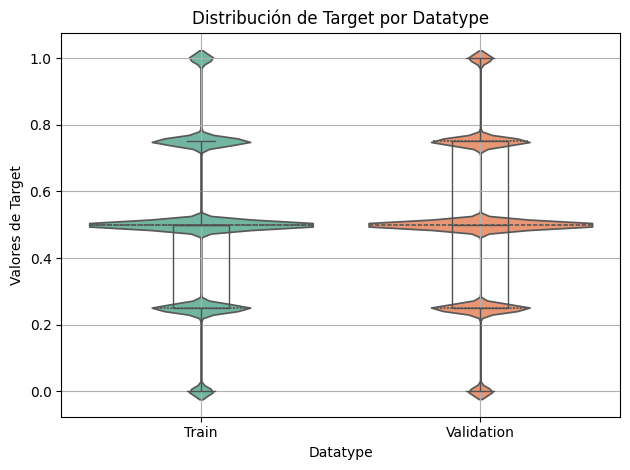

In [38]:
sns.violinplot(data=df_final, x='data_type', y='target', inner='quartile', palette='Set2')

output_path = 'graficos_eda_numerai/distribucion_target.jpg'

# Gráfico de caja y bigotes (boxplot) sobre el gráfico de violín
sns.boxplot(data=df_final, x='data_type', y='target', width=0.2, showcaps=True, boxprops={'facecolor': 'None'}, showfliers=False)

# Personalizar la gráfica
plt.title('Distribución de Target por Datatype')
plt.xlabel('Datatype')
plt.ylabel('Valores de Target')
plt.grid(True)
plt.tight_layout()
plt.savefig(output_path)

# Mostrar la gráfica
plt.show()

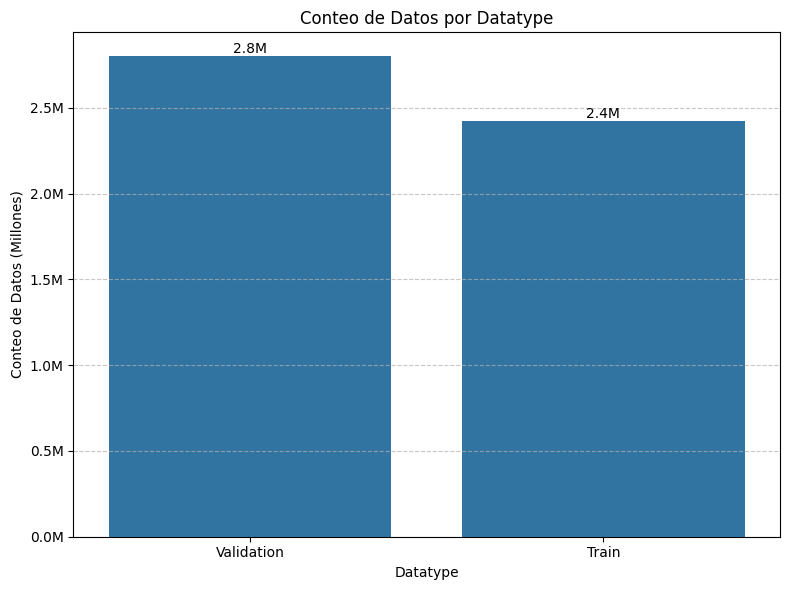

In [40]:
from matplotlib.ticker import FuncFormatter
datatype_counts = df_final['data_type'].value_counts().reset_index()
datatype_counts.columns = ['data_type', 'Nº valores']

output_path = 'graficos_eda_numerai/conteo_datos.jpg'

# Crear la gráfica de barras para representar el conteo
plt.figure(figsize=(8, 6))
sns.barplot(data=datatype_counts, x='data_type', y='Nº valores')

formatter = FuncFormatter(lambda x, pos: f'{float(x/1e6)}M')
plt.gca().yaxis.set_major_formatter(formatter)

for index, row in datatype_counts.iterrows():
    plt.text(index, row['Nº valores'], f'{round(float(row["Nº valores"]/1e6),1)}M', 
             ha='center', va='bottom', fontsize=10, color='black')

# Personalizar la gráfica
plt.title('Conteo de Datos por Datatype')
plt.xlabel('Datatype')
plt.ylabel('Conteo de Datos (Millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_path)

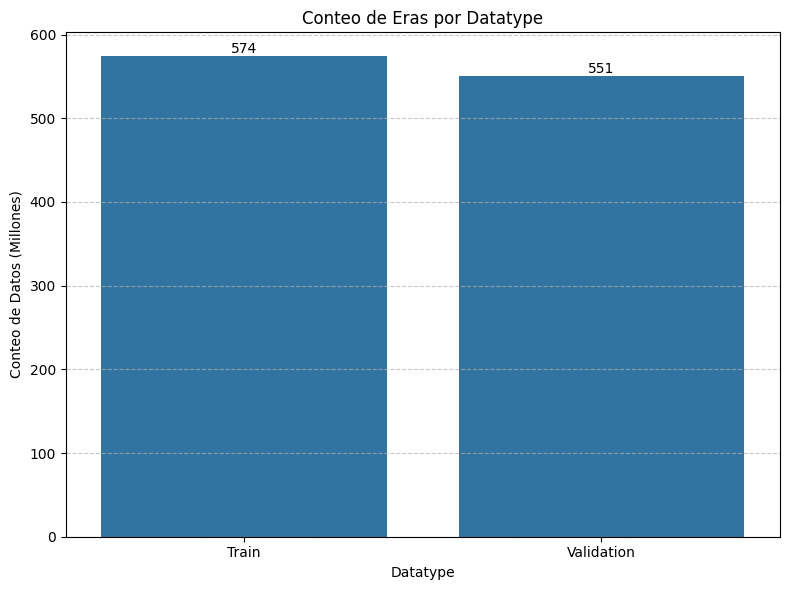

In [53]:
df_count = df_final.groupby(['data_type', "era"])["target"].sum().reset_index()
datatype_counts = df_count['data_type'].value_counts().reset_index()
datatype_counts.columns = ['data_type', 'Nº valores']

output_path = 'graficos_eda_numerai/conteo_eras.jpg'

# Crear la gráfica de barras para representar el conteo
plt.figure(figsize=(8, 6))
sns.barplot(data=datatype_counts, x='data_type', y='Nº valores')

formatter = FuncFormatter(lambda x, pos: f'{int(x)}')
plt.gca().yaxis.set_major_formatter(formatter)

for index, row in datatype_counts.iterrows():
    plt.text(index, row['Nº valores'], f'{int(row["Nº valores"])}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Personalizar la gráfica
plt.title('Conteo de Eras por Datatype')
plt.xlabel('Datatype')
plt.ylabel('Conteo de Datos (Millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_path)

In [19]:
del df_final

In [20]:
df_corr = df_filtrado.corr()

In [ ]:
df_corr

<Axes: title={'center': 'Number of rows per target'}, xlabel='Era'>

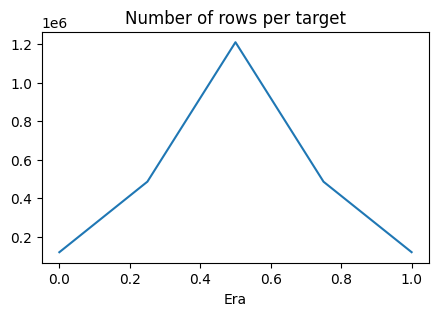

In [5]:
df.groupby("target").size().plot(
    title="Number of rows per target",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
print("Número de muestras por grupo en el DataFrame original:")
print(df.groupby(['era', 'target']).size())

# Calcular el número mínimo de muestras para cada valor único de 'mes'
min_samples_per_mes = df.groupby('era').apply(lambda x: x.groupby('target').size().min())

# Función para aplicar submuestreo a cada grupo dentro de un 'mes'
def balance_group(group, n_samples):
    return group.sample(n=n_samples, random_state=123)

# Aplicar el submuestreo a cada grupo dentro de cada 'mes'
def balance_groups(df):
    balanced_df = pd.DataFrame()
    for mes, group in df.groupby('era'):
        n_samples = min_samples_per_mes[mes]
        balanced_df = pd.concat([balanced_df, group.groupby('target').apply(lambda x: balance_group(x, n_samples)).reset_index(drop=True)])
    return balanced_df

df_balanced = balance_groups(df)

# Verificar el número de muestras por grupo en el DataFrame equilibrado
print("\nNúmero de muestras por grupo en el DataFrame equilibrado:")
print(df_balanced.groupby(['era', 'target']).size())

# Mostrar el DataFrame equilibrado
print("\nDataFrame equilibrado:")

In [ ]:
print(len(df_balanced))

In [ ]:
df_balanced.groupby("era").size().plot(
    title="Number of rows per era",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
df_balanced.groupby("target").size().plot(
    title="Number of rows per target",
    figsize=(5, 3),
    xlabel="Era"
)

In [ ]:
df_balanced["target"].plot(
  kind="hist",
  title="Target",
  figsize=(5, 3),
  xlabel="Value",
  density=True,
  bins=50
)

In [ ]:
del df
del min_samples_per_mes

df_balanced.to_json('datos_balanceados.json', orient='records', lines=True)